In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
data=pd.read_csv("insurance.csv")

In [252]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [254]:
data.shape

(1338, 7)

<AxesSubplot:>

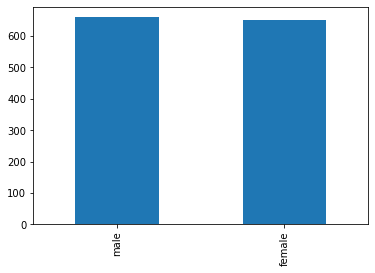

In [330]:
data.sex.value_counts().plot(kind='bar')

In [256]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [257]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [258]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='charges'>

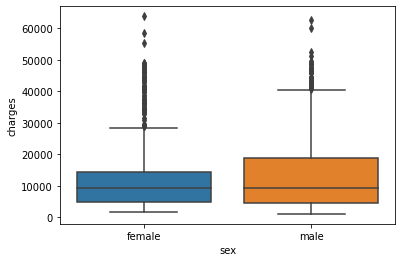

In [259]:
sns.boxplot(data['sex'],data['charges'])

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

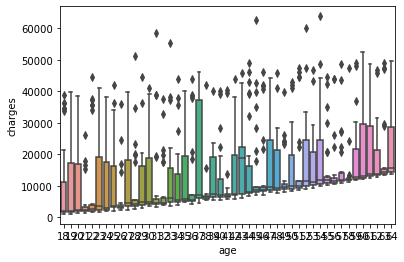

In [260]:
sns.boxplot(data['age'],data['charges'])

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='charges'>

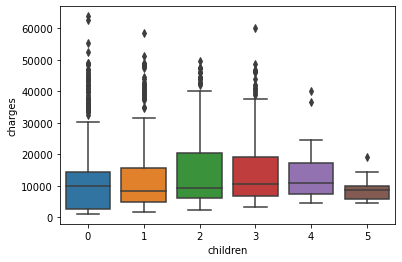

In [261]:
sns.boxplot(data['children'],data['charges'])

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='charges'>

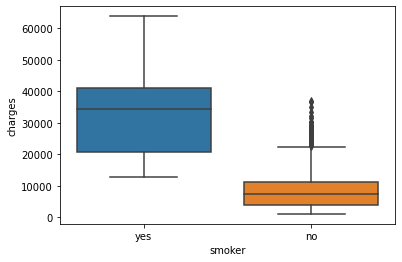

In [262]:
sns.boxplot(data['smoker'],data['charges'])

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='charges'>

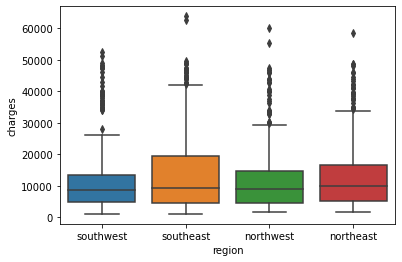

In [263]:
sns.boxplot(data['region'],data['charges'])

<AxesSubplot:>

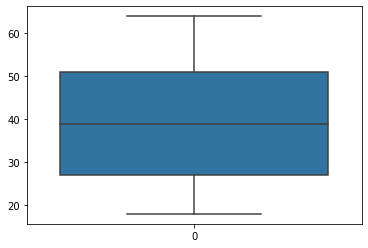

In [264]:
sns.boxplot(data=data.iloc[:,0])

<AxesSubplot:>

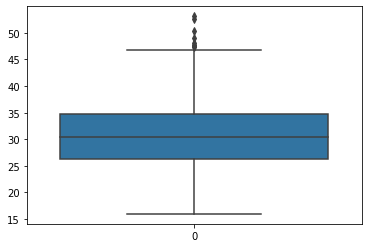

In [265]:
sns.boxplot(data=data.iloc[:,2])

<AxesSubplot:>

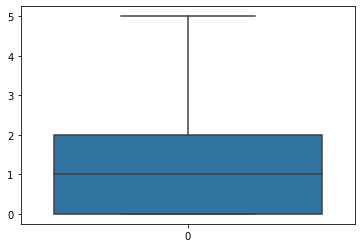

In [266]:
sns.boxplot(data=data.iloc[:,3])

In [267]:
data.bmi.max()

53.13

In [268]:
data.bmi.min()

15.96

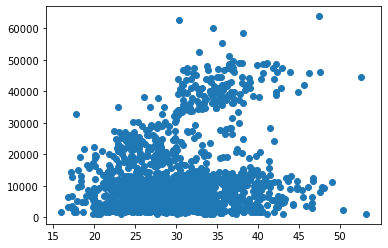

In [269]:
plt.scatter(data['bmi'],data['charges'])

In [270]:
data=data[data['bmi']<45]

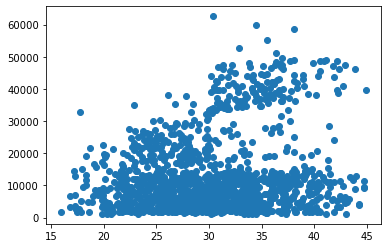

In [271]:
plt.scatter(data['bmi'],data['charges'])

In [292]:
hm=data.corr().round(2)

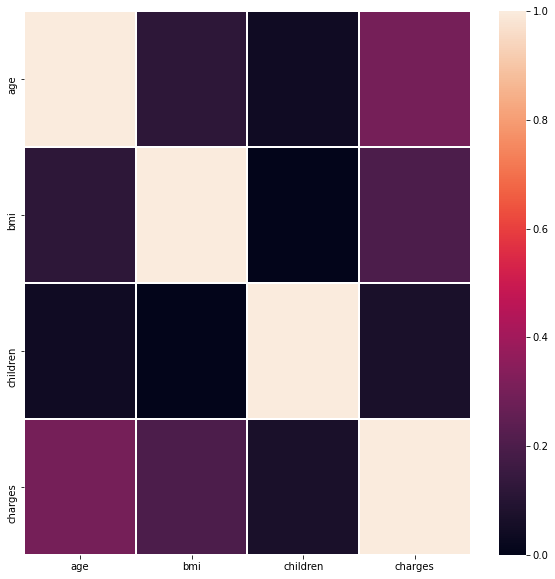

In [293]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(hm,linewidth=1)

In [305]:
del data['children']

In [306]:
data.head()

,age,sex,bmi,smoker,region,charges
6,46,female,33.44,no,southeast,8240.58960
7,37,female,27.74,no,northwest,7281.50560
8,37,male,29.83,no,northeast,6406.41070
9,60,female,25.84,no,northwest,28923.13692
10,25,male,26.22,no,northeast,2721.32080


In [307]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [308]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [309]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,3,4])], remainder='passthrough')

In [310]:
X=ct1.fit_transform(X)




In [311]:
X

array([[1.0, 0.0, 1.0, ..., 0.0, 46, 33.44],
       [1.0, 0.0, 1.0, ..., 0.0, 37, 27.74],
       [0.0, 1.0, 1.0, ..., 0.0, 37, 29.83],
       ...,
       [1.0, 0.0, 1.0, ..., 0.0, 18, 36.85],
       [1.0, 0.0, 1.0, ..., 1.0, 21, 25.8],
       [1.0, 0.0, 0.0, ..., 0.0, 61, 29.07]], dtype=object)

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [313]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [322]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [323]:
y_pred=regressor.predict(X_test)

In [324]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[ 7990.49996603  1242.816     ]
 [11738.85031637 19594.80965   ]
 [12249.78886068 22412.6485    ]
 [ 9617.87670507 10594.2257    ]
 [ 9755.8043585  13457.9608    ]
 [ 9020.23373246  6849.026     ]
 [ 8096.46783154  2150.469     ]
 [ 8392.3330026   5693.4305    ]
 [ 8501.99509999  2867.1196    ]
 [11064.65438472 19107.7796    ]
 [ 8539.29532952 17128.42608   ]
 [ 8208.74223688  1909.52745   ]
 [ 8898.55934128 19214.70553   ]
 [ 8898.11050656  6593.5083    ]
 [ 8480.44068893  4527.18295   ]
 [ 8155.29473261  1634.5734    ]
 [ 9459.14144068  9140.951     ]
 [ 7941.4386438   1731.677     ]
 [ 9601.95346001 12265.5069    ]
 [ 8354.44455699 22395.74424   ]
 [ 9247.8017892   8283.6807    ]
 [ 8471.17014098  3947.4131    ]
 [12113.01658295 24873.3849    ]
 [ 8170.1925012   2730.10785   ]
 [ 8811.83890065  5428.7277    ]
 [ 8809.5686435   6117.4945    ]
 [ 9275.18843201 32108.66282   ]
 [10786.60640406 38792.6856    ]
 [11180.38698843 36837.467     ]
 [11393.53211935 38415.474     ]
 [ 8223.68

In [325]:
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score


In [326]:
print(r2_score(y_test,y_pred))


0.023956295394915395


In [327]:
import math
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(explained_variance_score(y_test,y_pred))

12463.21834777753
0.15922896280909227


In [328]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

In [329]:
print('r2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


r2: -0.097 (0.116)
